# Movie Recommendation System

![movie_catalog](Images/catalog_pics.jpg)

## Overview
Movie recommendation systems are like friendly guides that help you discover new films you'll love. Imagine a world with thousands of movies to choose from; it can be overwhelming. That's where recommendation systems come in. They use clever math and your past movie preferences to suggest films you might enjoy. These systems make your movie-watching experience more enjoyable by saving you time and introducing you to movies you might have never found on your own.

## Business Understanding
Competition among movie companies in today's digital landscape is more intense than ever before. With a vast array of streaming platforms and content providers vying for viewers' attention, the role of a robust movie recommendation system becomes paramount. Such systems offer a competitive edge by enhancing user engagement and satisfaction. They do this by leveraging sophisticated algorithms to analyze user preferences, viewing history, and ratings, ensuring that viewers are consistently presented with content that aligns with their tastes. 

This personalization not only keeps viewers engaged but also helps companies differentiate themselves in a crowded market. By recommending content that resonates with individual viewers, companies can increase customer retention, drive user loyalty, and ultimately outperform their competitors. Furthermore, recommendation systems can aid in content discovery, ensuring that lesser-known titles have a chance to shine, thus diversifying a company's content portfolio and attracting a broader audience. 

### Problem Statement
The problem at hand revolves around the development of an effective movie recommendation system that caters to the diverse preferences of users based on their past movie ratings. In the era of digital streaming platforms and an ever-expanding catalog of movies, users are often overwhelmed by choice and may struggle to discover content aligned with their tastes. This leads to reduced user engagement and satisfaction, potentially impacting the success of the movie platform.

Have you ever spent a lot of time scrolling through a movie streaming service, unsure of what to watch because there are so many options? This happens because there are thousands of movies available, and it's hard to pick the right one. My project aims to solve this problem. By using data about what movies people have rated highly in the past, we can suggest the top 5 movies that each person is likely to enjoy. This way, users don't have to spend a long time searching, and they can start watching a movie they'll probably love right away.

The ultimate goal of this project is to make the experience of choosing and watching movies more enjoyable for users.I want to help people discover new movies they might not have found on their own and keep them engaged with the platform. Additionally, the aim is to benefit the movie platform itself by increasing user satisfaction and retention. When users find movies they love more easily, they're more likely to keep using the service, which can lead to more success for the platform in a competitive market. So, our project isn't just about recommending movies; it's about enhancing the overall movie-watching experience for everyone.

The core problem statement is to create a robust recommendation model that can analyze user-provided movie ratings and, leveraging advanced algorithms, generate a list of the top 5 movie recommendations that resonate with each user's unique preferences.


#### In summary, my goals include:

* **Data Collection:**
Gather a dataset containing information on movies, user ratings, and user profiles.

* **Data Preprocessing:**
Clean and preprocess the dataset to handle missing values, remove duplicates, and format it for analysis.

* **User Profiling:** 
Understand each user's preferences by analyzing their past movie ratings.

* **Model Building:**
Develop a recommendation model which uses collaborative filtering to generate personalized movie recommendations.

* **Evaluation:**
Assess the model's performance using appropriate evaluation metrics such as accuracy, RMSE or MAE.

## Data Understanding
For this project, I am provided with two datasets. The first dataset, which I'll refer to as the "Movie Data" dataset, contains key information about movies. It comprises three columns: 'movieId,' 'title,' and 'genres.' The 'movieId' column serves as a unique identifier for each movie, ensuring data integrity and facilitating linkage with other datasets. The 'title' column stores the titles of the movies, providing clear identification and labeling for each entry. Meanwhile, the 'genres' column categorizes movies into different genres, offering insights into the content and style of each film.

The second dataset, which I'll refer to as the "User Rating Data" dataset, captures user interactions with movies, specifically their ratings. It consists of three columns: 'userId,' 'movieId,' and 'rating.' The 'userId' column represents unique user identifiers, enabling the association of each rating with a specific user. The 'movieId' column links each rating to a movie in the Movie Data dataset, facilitating the creation of user-movie relationships. The 'rating' column stores user-assigned ratings, typically on a numerical scale, indicating user preferences for movies. This dataset is instrumental in building collaborative filtering models, as it forms the basis for understanding user behavior and preferences. It allows the system to recommend movies to users based on the ratings and preferences of similar users, enhancing personalization and user satisfaction in the movie recommendation process.

## Data Preparation
I first import the relevant packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the surprise modules
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV, train_test_split
from surprise.accuracy import rmse

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#setting style
plt.style.use("seaborn-v0_8-darkgrid")

#enabling inline plotting
%matplotlib inline

Loading the user ratings dataset and previewing the first five columns:

In [2]:
ratings = pd.read_csv('data/ratings.csv')

#first five columns
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


From the columns above, in this project I will not need the `timestamp` column and so I'll drop it. 

In [3]:
#dropping the timestamp column and previewing the data again
user_rating = ratings.drop('timestamp', axis =1)
user_rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


A brief information about the columns and number of rows present:

In [4]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


Loading the movie titles dataset:

In [5]:
movie_titles = pd.read_csv('data/movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


This dataset contains the movieId and title of each movie based on their Ids. This will be important when making recommendations for unrated movies to a user.

Checking the info of this dataset:

In [6]:
#info
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### Checking for missing values in both datasets
The datasets may contain missing values which may become a problem when trying to build a model.

In [7]:
#checking missing values in user ratings data
user_rating.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

The user ratings dataset does not have missing values. Now I check missing values in the movie title dataset.

In [8]:
#missing values in movie title df
movie_titles.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

This dataset as well does not have any missing values.

### Checking for duplicates
The dataset may as well contain duplicates hence this step is necessary.

In [9]:
#checking for duplicates in user rating dataframe
user_rating.duplicated().value_counts()

False    100836
Name: count, dtype: int64

The user ratings columns doesn't have any duplicates. That's good. I now check for duplicates in the movie titles dataframe.

In [10]:
#checking for duplicates
movie_titles.duplicated().value_counts()

False    9742
Name: count, dtype: int64

This dataset as well doesn't have any duplicates.

### Transforming user ratings dataframe to Surprise

It's now time to transform the dataset into something compatible with `surprise`. In order to do this, I am going to use `Reader` and `Dataset` classes.

In [11]:
# reading in values as Surprise Dataset
reader = Reader()
data = Dataset.load_from_df(user_rating[['userId', 'movieId', 'rating']], reader)

Looking at how many users and items are in the dataset:

In [12]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


Calling the data, we can see that it is indeed a surprise dataset.

In [13]:
data

### User Profiling
Before beginning modeling, I added this extra step as one of the goals of this project to sample a random user and preview what movie genres they like. This is the user I will be making 5 recommendations for. I will want to see if the model makes accurate predictions on the movies this user may like based on their genres.

#### Sampling a random user

In [16]:
#setting random seed for reproducibility
np.random.seed(54)
user_rating.sample(1)

,userId,movieId,rating
68102,438,7444,3.0


In [17]:
#storing this user id
user = 438

#### Identifying the highly rated movies based on genre
To do this, I will join the movie title dataframe on the user ratings dataset specifically for `user 438` focussing mostly on the genre.

In [19]:
#creating dataframe or user 438 only
user438 = user_rating.loc[user_rating['userId'] == user]
user438

,userId,movieId,rating
67583,438,1,4.5
67584,438,6,5.0
67585,438,10,4.0
67586,438,11,4.0
67587,438,19,3.0
...,...,...,...
68213,438,48516,4.5
68214,438,48774,3.0
68215,438,48780,4.0
68216,438,49272,4.0


This user has rated 635 movie titles. Now let me do the join.

In [39]:
# Merge user438s with movie titles
user438_movie_ratings = pd.merge(user438, movie_titles, on='movieId')
user438_movie_ratings

,userId,movieId,rating,title,genres
0,438,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,438,6,5.0,Heat (1995),Action|Crime|Thriller
2,438,10,4.0,GoldenEye (1995),Action|Adventure|Thriller
3,438,11,4.0,"American President, The (1995)",Comedy|Drama|Romance
4,438,19,3.0,Ace Ventura: When Nature Calls (1995),Comedy
...,...,...,...,...,...
630,438,48516,4.5,"Departed, The (2006)",Crime|Drama|Thriller
631,438,48774,3.0,Children of Men (2006),Action|Adventure|Drama|Sci-Fi|Thriller
632,438,48780,4.0,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller
633,438,49272,4.0,Casino Royale (2006),Action|Adventure|Thriller


#### Plotting highly rated genres for user 438

In [42]:
#user438 three highest rated genres 
user438_ratings = user438_movie_ratings.sort_values(by = 'rating', ascending = False).head(3)
user438_ratings

,userId,movieId,rating,title,genres
634,438,51662,5.0,300 (2007),Action|Fantasy|War|IMAX
493,438,7090,5.0,Hero (Ying xiong) (2002),Action|Adventure|Drama
462,438,6539,5.0,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy


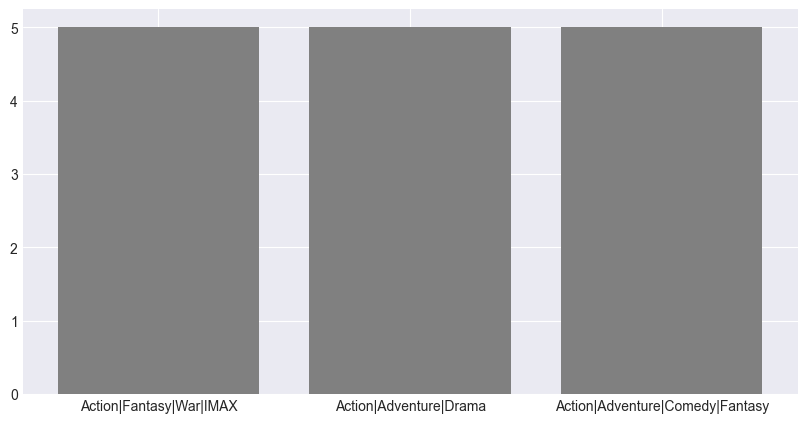

In [53]:
#plotting bar plot
plt.figure(figsize = (10,5))
plt.bar(user438_ratings['genres'], user438_ratings['rating'], color = 'grey');

From the plot above, these are the highly rated genres for `user 438`.

## Modeling